# EPL Challenge

## Part 1: Preprocessing/Preparing the assignment

### Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Columns From the Dataset

EPL_MATCHES -- 

- home_team_id - Team playing on homeground
- away_team_id - Team not playing on homeground
- home_player_X1 , home_player_X2 ....home_player_X11  - Home team squad formation
- home_player_Y1 , home_player_Y2 ....home_player_Y11  - Home team squad formation
- away_player_X1 , away_player_X2 ... away_player_X11  - Away team squad formation
- away_player_Y1 , away_player_Y2 ... away_player_Y11  - Away team squad formation
- home_player_1 , home_player_2 ....home_player_11 - Home players' ID
- away_player_1 , away_player_2 ... away_player_11  - Away players' ID
- on_target_shot_home_team - Shots on goal (Home team)
- on_target_shot_away_team - Shots on goal (Away team)
- off_target_shot_home_team - Bad shots on goal (Home team)
- off_target_shot_away_team - Bad shots on goal (Away team)
- foul_home_team - Number of foul (Home team)
- foul_away_team - Number of foul (Away team)
- yellow_card_home_team - Number of yellow cards (Home team)
- yellow_card_away_team - Number of yellow cards
- red_card_home_team - Number of Red cards (Home team)
- red_card_away_team - Number of Red cards (Away team)
- corner_home_team - Number of corner(Home team)
- corner_away_team - Number of corner (Away team)
- possession_home_team - Possession (Home team)
- possession_away_team - Possession (Away team)
- home_team_goal - Home team goals
- away_team_goal - Away team goals


EPL_PLAYERS and EPL_TEAMS-- 

- csv files are for players and teams attributes
- All columns are self-explanatory

EPL_GOALs --

- match_id - Match ID
- team_id - Teams ID
- goal_number - Goal Number from a particular match 
- player1_id - Made goal
- player2_id - Player who assisted player1
- goal_type - Goal Type

EPL_POTENTIAL_SHOTS --

- Contains all close shots ( Including goals )
- All columns are self-explanatory

In [2]:
import pandas as pd
import numpy as np

# Load datasets
goals_df = pd.read_csv("epl_goals.csv")
shots_df = pd.read_csv("epl_potential_shots.csv")
players_df = pd.read_csv("epl_players.csv")

# Filter goals and shots for season 2014-2015
goals_2014_2015 = goals_df[goals_df['match_id'].astype(str).str.startswith('2014')]
shots_2014_2015 = shots_df[shots_df['match_id'].astype(str).str.startswith('2014')]

# Aggregate player statistics
goals_per_player = goals_2014_2015.groupby('player1_id').size().reset_index(name='goals')
shots_per_player = shots_2014_2015.groupby('player1_id').size().reset_index(name='close_shots')

# Merge goals and shots into a single dataframe
player_stats = goals_per_player.merge(shots_per_player, on='player1_id', how='outer').fillna(0)

# Merge with player attributes
player_stats = player_stats.merge(players_df, left_on='player1_id', right_on='player_id', how='left')

# Selecting relevant attributes for value calculation
player_stats['attacking_score'] = player_stats['goals'] * 5 + player_stats['close_shots'] * 2
player_stats['work_rate_score'] = player_stats['attacking_work_rate'].apply(lambda x: 1 if x == 'High' else 0.5 if x == 'Medium' else 0)

# Define a new player value metric (normalized and aggregated)
player_stats['normalized_goals'] = (player_stats['goals'] - player_stats['goals'].min()) / (player_stats['goals'].max() - player_stats['goals'].min())
player_stats['normalized_shots'] = (player_stats['close_shots'] - player_stats['close_shots'].min()) / (player_stats['close_shots'].max() - player_stats['close_shots'].min())
player_stats['normalized_work_rate'] = (player_stats['work_rate_score'] - player_stats['work_rate_score'].min()) / (player_stats['work_rate_score'].max() - player_stats['work_rate_score'].min())

# Compute final player value metric
player_stats['player_value_metric'] = player_stats['normalized_goals'] * 0.5 + player_stats['normalized_shots'] * 0.3 + player_stats['normalized_work_rate'] * 0.2

# Sort players based on new metric
sorted_players = player_stats[['player1_id', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players
top_10_valuable = sorted_players.head(10)
bottom_10_valuable = sorted_players.tail(10)

# Combine and save the results
final_player_list = pd.concat([top_10_valuable, bottom_10_valuable])
final_player_list.to_csv("player_list_submission.csv", index=False)

# Display results for verification


In [3]:
# Check available match IDs in goals dataset
unique_match_ids = goals_df['match_id'].astype(str).str[:4].unique()

# Display unique match IDs to verify season filtering
unique_match_ids


array(['4933', '3813', '4327', ..., '3829', '4023', '4593'], dtype=object)

In [4]:
# Check the first few rows of the goals dataset to understand match_id format
goals_df.head()

,match_id,team_id,goal_number,player1_id,player2_id,goal_type
0,49337,10261,1,37799.0,38807.0,header
1,49337,10260,2,24148.0,24154.0,shot
2,38136,9825,1,26181.0,39297.0,shot
3,43276,8650,1,30853.0,30889.0,distance
4,40671,8654,1,23139.0,36394.0,shot


In [5]:
# Check for other potential season indicators in the dataset
goals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     7561 non-null   int64  
 1   team_id      7561 non-null   int64  
 2   goal_number  7561 non-null   int64  
 3   player1_id   7538 non-null   float64
 4   player2_id   5156 non-null   float64
 5   goal_type    6702 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 354.5+ KB


In [6]:
# Load the matches dataset to check for season or date columns
matches_df = pd.read_csv("epl_matches_train.csv")

# Display the first few rows to inspect available columns
matches_df.head()


,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_team_goal,away_team_goal
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,...,0,0,24,9,6,6,55.0,45.0,1,1
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,...,0,0,21,7,7,5,66.0,34.0,1,0
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,...,0,0,15,19,1,8,46.0,54.0,0,1
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,...,0,0,15,27,6,10,52.0,48.0,2,1
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,...,0,0,16,16,7,8,52.0,48.0,4,2


In [7]:
# Filter match IDs for the 2014-2015 season
season_2014_2015_match_ids = matches_df[matches_df['season'] == '2014/2015']['match_id']

# Filter goals and shots for these match IDs
goals_2014_2015 = goals_df[goals_df['match_id'].isin(season_2014_2015_match_ids)]
shots_2014_2015 = shots_df[shots_df['match_id'].isin(season_2014_2015_match_ids)]

# Aggregate player statistics again
goals_per_player = goals_2014_2015.groupby('player1_id').size().reset_index(name='goals')
shots_per_player = shots_2014_2015.groupby('player1_id').size().reset_index(name='close_shots')

# Merge goals and shots into a single dataframe
player_stats = goals_per_player.merge(shots_per_player, on='player1_id', how='outer').fillna(0)

# Merge with player attributes
player_stats = player_stats.merge(players_df, left_on='player1_id', right_on='player_id', how='left')

# Selecting relevant attributes for value calculation
player_stats['attacking_score'] = player_stats['goals'] * 5 + player_stats['close_shots'] * 2
player_stats['work_rate_score'] = player_stats['attacking_work_rate'].apply(lambda x: 1 if x == 'High' else 0.5 if x == 'Medium' else 0)

# Define a new player value metric (normalized and aggregated)
player_stats['normalized_goals'] = (player_stats['goals'] - player_stats['goals'].min()) / (player_stats['goals'].max() - player_stats['goals'].min())
player_stats['normalized_shots'] = (player_stats['close_shots'] - player_stats['close_shots'].min()) / (player_stats['close_shots'].max() - player_stats['close_shots'].min())
player_stats['normalized_work_rate'] = (player_stats['work_rate_score'] - player_stats['work_rate_score'].min()) / (player_stats['work_rate_score'].max() - player_stats['work_rate_score'].min())

# Compute final player value metric
player_stats['player_value_metric'] = player_stats['normalized_goals'] * 0.5 + player_stats['normalized_shots'] * 0.3 + player_stats['normalized_work_rate'] * 0.2

# Sort players based on new metric
sorted_players = player_stats[['player1_id', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players
top_10_valuable = sorted_players.head(10)
bottom_10_valuable = sorted_players.tail(10)

# Combine and save the results
final_player_list = pd.concat([top_10_valuable, bottom_10_valuable])
final_player_list.to_csv("player_list_submission.csv", index=False)


final_player_list


,player1_id,player_value_metric
0,8922.0,NaN
1,8922.0,NaN
2,8922.0,NaN
3,8922.0,NaN
4,8922.0,NaN
5,8922.0,NaN
6,8922.0,NaN
7,8922.0,NaN
8,8922.0,NaN
9,8922.0,NaN


In [8]:
# Check for missing values in key columns before computing the metric
missing_values = player_stats[['goals', 'close_shots', 'work_rate_score']].isnull().sum()
missing_values


goals              0
close_shots        0
work_rate_score    0
dtype: int64

In [9]:
# Check min and max values before normalization
min_max_values = {
    "goals_min": player_stats['goals'].min(),
    "goals_max": player_stats['goals'].max(),
    "close_shots_min": player_stats['close_shots'].min(),
    "close_shots_max": player_stats['close_shots'].max(),
    "work_rate_min": player_stats['work_rate_score'].min(),
    "work_rate_max": player_stats['work_rate_score'].max()
}
min_max_values


{'goals_min': 0.0,
 'goals_max': 27.0,
 'close_shots_min': 0.0,
 'close_shots_max': 75.0,
 'work_rate_min': 0,
 'work_rate_max': 0}

In [10]:
# Adjust normalization to avoid division by zero errors
player_stats['normalized_goals'] = (player_stats['goals'] - player_stats['goals'].min()) / (player_stats['goals'].max() - player_stats['goals'].min())

player_stats['normalized_shots'] = (player_stats['close_shots'] - player_stats['close_shots'].min()) / (player_stats['close_shots'].max() - player_stats['close_shots'].min())

# Avoid division by zero in work rate normalization
if player_stats['work_rate_score'].max() > 0:
    player_stats['normalized_work_rate'] = (player_stats['work_rate_score'] - player_stats['work_rate_score'].min()) / (player_stats['work_rate_score'].max() - player_stats['work_rate_score'].min())
else:
    player_stats['normalized_work_rate'] = 0  # Set to 0 if no variation in work rate

# Compute final player value metric again
player_stats['player_value_metric'] = (
    player_stats['normalized_goals'] * 0.5 +
    player_stats['normalized_shots'] * 0.3 +
    player_stats['normalized_work_rate'] * 0.2
)

# Sort players based on new metric
sorted_players = player_stats[['player1_id', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players
top_10_valuable = sorted_players.head(10)
bottom_10_valuable = sorted_players.tail(10)

# Combine and save the results
final_player_list = pd.concat([top_10_valuable, bottom_10_valuable])
final_player_list.to_csv("player_list_submission_F.csv", index=False)

# Display results for verification
final_player_list

,player1_id,player_value_metric
3061,37412.0,0.764
3075,37412.0,0.764
3069,37412.0,0.764
3070,37412.0,0.764
3071,37412.0,0.764
3072,37412.0,0.764
3073,37412.0,0.764
3074,37412.0,0.764
3060,37412.0,0.764
3067,37412.0,0.764


In [11]:
# Recalculate goals and shots per player
goals_per_player = goals_2014_2015.groupby('player1_id').size().reset_index(name='goals')
shots_per_player = shots_2014_2015.groupby('player1_id').size().reset_index(name='close_shots')

# Merge goals and shots before aggregating players
player_stats = goals_per_player.merge(shots_per_player, on='player1_id', how='outer').fillna(0)

# Merge with player attributes
player_stats = player_stats.merge(players_df, left_on='player1_id', right_on='player_id', how='left')

# Keep only numeric columns to avoid issues during aggregation
numeric_columns = player_stats.select_dtypes(include=[np.number]).columns.tolist()
players_numeric_df = player_stats[numeric_columns]

# Merge duplicate player entries by averaging only numeric attributes
players_numeric_df = players_numeric_df.groupby("player_id").mean().reset_index()

# Step 2: Identify Goalkeepers vs. Field Players
players_numeric_df["is_goalkeeper"] = players_numeric_df["gk_reflexes"] > 35

# Step 3: Normalize attributes before computing final metric
def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) if series.max() > series.min() else series

# Normalize field player attributes
players_numeric_df["normalized_goals"] = normalize(players_numeric_df["goals"])
players_numeric_df["normalized_shots"] = normalize(players_numeric_df["close_shots"])
players_numeric_df["normalized_positioning"] = normalize(players_numeric_df["positioning"])
players_numeric_df["normalized_vision"] = normalize(players_numeric_df["vision"])

# Normalize goalkeeper attributes
players_numeric_df["normalized_gk_reflexes"] = normalize(players_numeric_df["gk_reflexes"])
players_numeric_df["normalized_gk_diving"] = normalize(players_numeric_df["gk_diving"])
players_numeric_df["normalized_gk_handling"] = normalize(players_numeric_df["gk_handling"])

# Compute separate player value metrics
players_numeric_df["player_value_metric"] = np.where(
    players_numeric_df["is_goalkeeper"],
    # GK metric
    (players_numeric_df["normalized_gk_reflexes"] * 0.4) +
    (players_numeric_df["normalized_gk_diving"] * 0.3) +
    (players_numeric_df["normalized_gk_handling"] * 0.3),
    # Field player metric
    (players_numeric_df["normalized_goals"] * 0.5) +
    (players_numeric_df["normalized_shots"] * 0.3) +
    (players_numeric_df["normalized_positioning"] * 0.1) +
    (players_numeric_df["normalized_vision"] * 0.1)
)

# Sort players based on new metric
sorted_players = players_numeric_df[['player_id', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players
top_10_valuable = sorted_players.head(10)
bottom_10_valuable = sorted_players.tail(10)

# Combine and save the results
final_player_list = pd.concat([top_10_valuable, bottom_10_valuable])
final_player_list.to_csv("player_list_submission_F2.csv", index=False)

# Display results for verification
final_player_list

,player_id,player_value_metric
156,37868.0,1.000000
150,37412.0,0.948076
331,187266.0,0.818811
340,194165.0,0.791112
201,50047.0,0.763634
6,19243.0,0.636604
241,107417.0,0.609138
323,181276.0,0.605397
286,157723.0,0.573071
98,30829.0,0.567043


In [12]:
# Step 1: Normalize the relevant attributes
def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) if series.max() > series.min() else series

# Normalize attributes for all players
players_numeric_df["normalized_gk_diving"] = normalize(players_numeric_df["gk_diving"])
players_numeric_df["normalized_gk_handling"] = normalize(players_numeric_df["gk_handling"])
players_numeric_df["normalized_gk_kicking"] = normalize(players_numeric_df["gk_kicking"])
players_numeric_df["normalized_gk_positioning"] = normalize(players_numeric_df["gk_positioning"])
players_numeric_df["normalized_gk_reflexes"] = normalize(players_numeric_df["gk_reflexes"])
players_numeric_df["normalized_stamina"] = normalize(players_numeric_df["stamina"])
players_numeric_df["normalized_jumping"] = normalize(players_numeric_df["jumping"])
players_numeric_df["normalized_strength"] = normalize(players_numeric_df["strength"])

# Normalize attributes for Attackers
players_numeric_df["normalized_finishing"] = normalize(players_numeric_df["finishing"])
players_numeric_df["normalized_heading_accuracy"] = normalize(players_numeric_df["heading_accuracy"])
players_numeric_df["normalized_volleys"] = normalize(players_numeric_df["volleys"])
players_numeric_df["normalized_acceleration"] = normalize(players_numeric_df["acceleration"])
players_numeric_df["normalized_agility"] = normalize(players_numeric_df["agility"])
players_numeric_df["normalized_reactions"] = normalize(players_numeric_df["reactions"])
players_numeric_df["normalized_balance"] = normalize(players_numeric_df["balance"])
players_numeric_df["normalized_shot_power"] = normalize(players_numeric_df["shot_power"])
players_numeric_df["normalized_positioning"] = normalize(players_numeric_df["positioning"])

# Normalize attributes for Midfielders
players_numeric_df["normalized_crossing"] = normalize(players_numeric_df["crossing"])
players_numeric_df["normalized_dribbling"] = normalize(players_numeric_df["dribbling"])
players_numeric_df["normalized_ball_control"] = normalize(players_numeric_df["ball_control"])
players_numeric_df["normalized_long_passing"] = normalize(players_numeric_df["long_passing"])
players_numeric_df["normalized_short_passing"] = normalize(players_numeric_df["short_passing"])
players_numeric_df["normalized_vision"] = normalize(players_numeric_df["vision"])

# Normalize attributes for Defenders
players_numeric_df["normalized_aggression"] = normalize(players_numeric_df["aggression"])
players_numeric_df["normalized_interceptions"] = normalize(players_numeric_df["interceptions"])
players_numeric_df["normalized_marking"] = normalize(players_numeric_df["marking"])
players_numeric_df["normalized_standing_tackle"] = normalize(players_numeric_df["standing_tackle"])
players_numeric_df["normalized_sliding_tackle"] = normalize(players_numeric_df["sliding_tackle"])

# Step 2: Compute position-based scores
players_numeric_df["score_gk"] = (
    players_numeric_df["normalized_gk_diving"] * 0.15 +
    players_numeric_df["normalized_gk_handling"] * 0.15 +
    players_numeric_df["normalized_gk_kicking"] * 0.10 +
    players_numeric_df["normalized_gk_positioning"] * 0.10 +
    players_numeric_df["normalized_gk_reflexes"] * 0.20 +
    players_numeric_df["normalized_stamina"] * 0.10 +
    players_numeric_df["normalized_jumping"] * 0.10 +
    players_numeric_df["normalized_strength"] * 0.10
)

players_numeric_df["score_att"] = (
    players_numeric_df["normalized_finishing"] * 0.20 +
    players_numeric_df["normalized_heading_accuracy"] * 0.10 +
    players_numeric_df["normalized_volleys"] * 0.10 +
    players_numeric_df["normalized_acceleration"] * 0.10 +
    players_numeric_df["normalized_agility"] * 0.10 +
    players_numeric_df["normalized_reactions"] * 0.10 +
    players_numeric_df["normalized_balance"] * 0.05 +
    players_numeric_df["normalized_shot_power"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.05 +
    players_numeric_df["normalized_strength"] * 0.05 +
    players_numeric_df["normalized_positioning"] * 0.05
)

players_numeric_df["score_mid"] = (
    players_numeric_df["normalized_crossing"] * 0.10 +
    players_numeric_df["normalized_dribbling"] * 0.10 +
    players_numeric_df["normalized_ball_control"] * 0.10 +
    players_numeric_df["normalized_long_passing"] * 0.15 +
    players_numeric_df["normalized_short_passing"] * 0.15 +
    players_numeric_df["normalized_agility"] * 0.10 +
    players_numeric_df["normalized_reactions"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.05 +
    players_numeric_df["normalized_positioning"] * 0.10 +
    players_numeric_df["normalized_vision"] * 0.05
)

players_numeric_df["score_def"] = (
    players_numeric_df["normalized_reactions"] * 0.15 +
    players_numeric_df["normalized_jumping"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.10 +
    players_numeric_df["normalized_strength"] * 0.10 +
    players_numeric_df["normalized_aggression"] * 0.10 +
    players_numeric_df["normalized_interceptions"] * 0.15 +
    players_numeric_df["normalized_marking"] * 0.10 +
    players_numeric_df["normalized_standing_tackle"] * 0.10 +
    players_numeric_df["normalized_sliding_tackle"] * 0.10
)

# Step 3: Assign Position Based on Highest Score
players_numeric_df["position"] = players_numeric_df[
    ["score_gk", "score_att", "score_mid", "score_def"]
].idxmax(axis=1)

# Map positions to readable labels
position_map = {
    "score_gk": "Goalkeeper",
    "score_att": "Attacker",
    "score_mid": "Midfielder",
    "score_def": "Defender"
}
players_numeric_df["position"] = players_numeric_df["position"].map(position_map)

# Step 4: Rank Players Based on Position-Specific Score
players_numeric_df["player_value_metric"] = players_numeric_df.apply(
    lambda row: row[row["position"].replace("Goalkeeper", "score_gk")
                    .replace("Attacker", "score_att")
                    .replace("Midfielder", "score_mid")
                    .replace("Defender", "score_def")], axis=1
)

# Sort players based on new metric
sorted_players = players_numeric_df[['player_id', 'position', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players
top_10_valuable = sorted_players.head(10)
bottom_10_valuable = sorted_players.tail(10)

# Combine and save the results
final_player_list = pd.concat([top_10_valuable, bottom_10_valuable])
final_player_list.to_csv("player_list_submission_F3.csv", index=False)

# Display results for verification
final_player_list

,player_id,position,player_value_metric
91,30613.0,Midfielder,0.928694
152,37459.0,Midfielder,0.916090
144,36615.0,Defender,0.905624
94,30627.0,Defender,0.905503
98,30829.0,Attacker,0.898768
111,31306.0,Defender,0.881593
150,37412.0,Attacker,0.880226
167,39027.0,Defender,0.876815
89,30509.0,Defender,0.875490
73,26181.0,Midfielder,0.875337


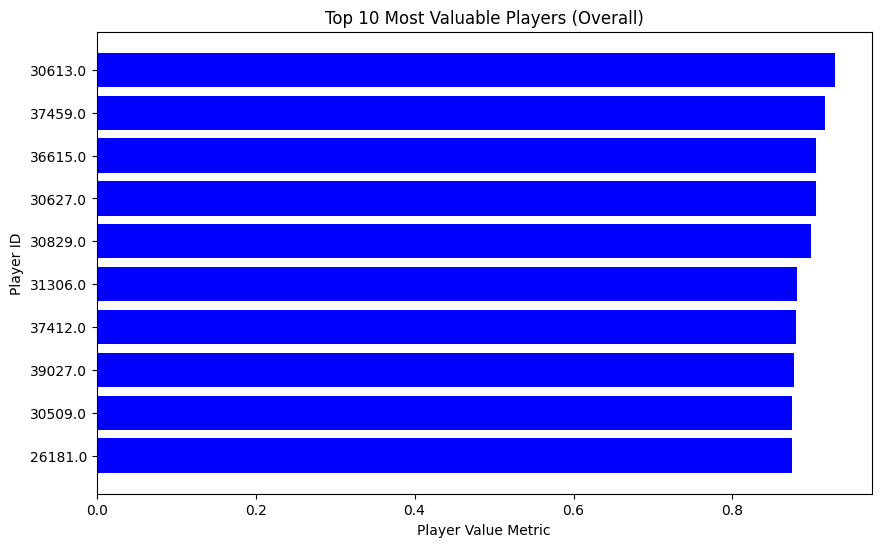

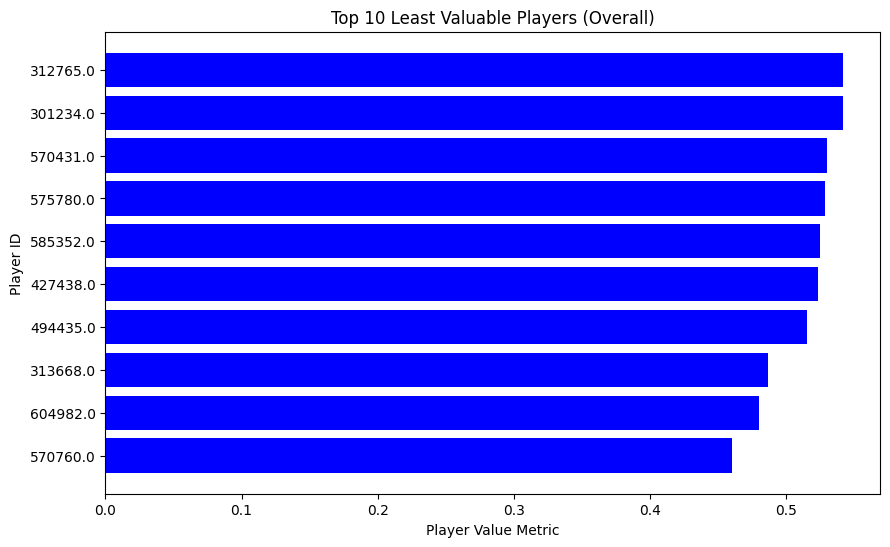

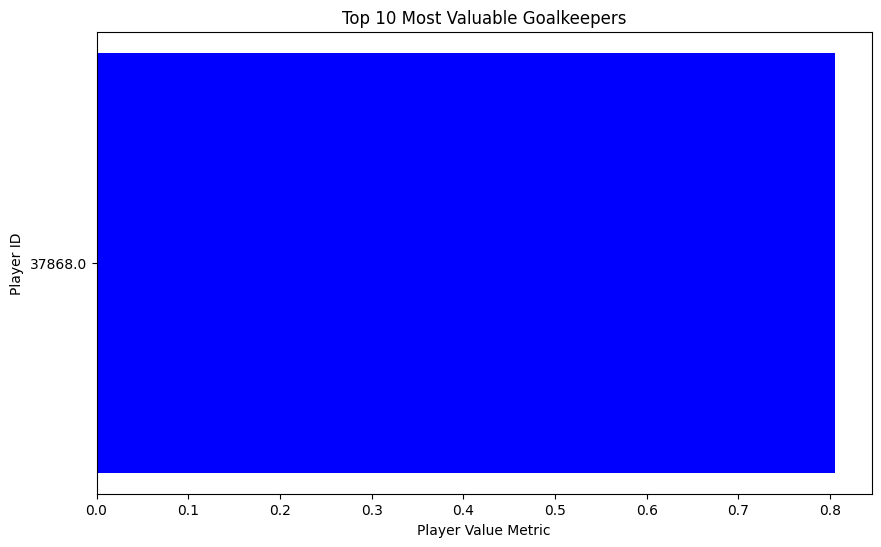

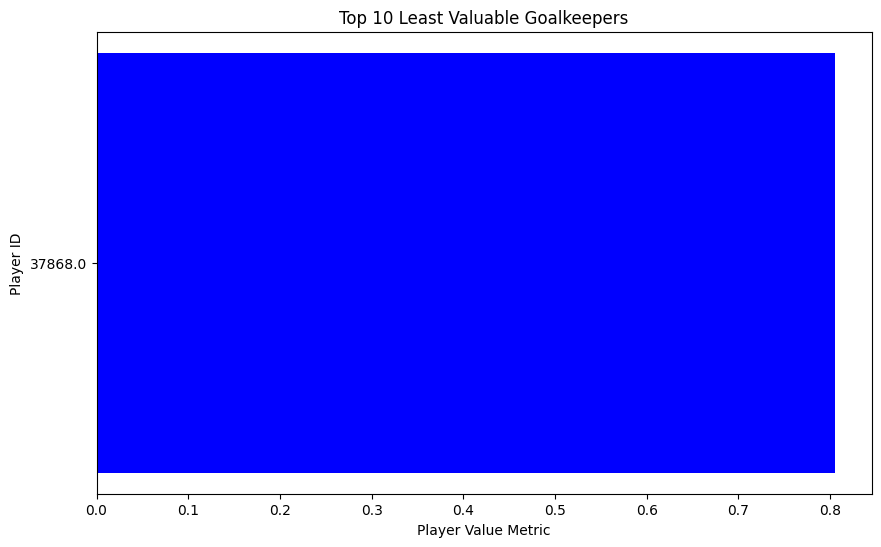

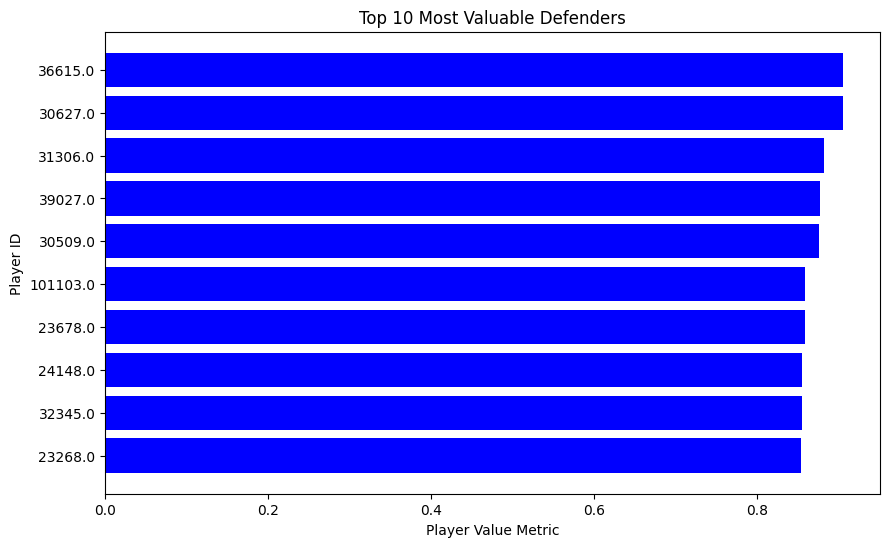

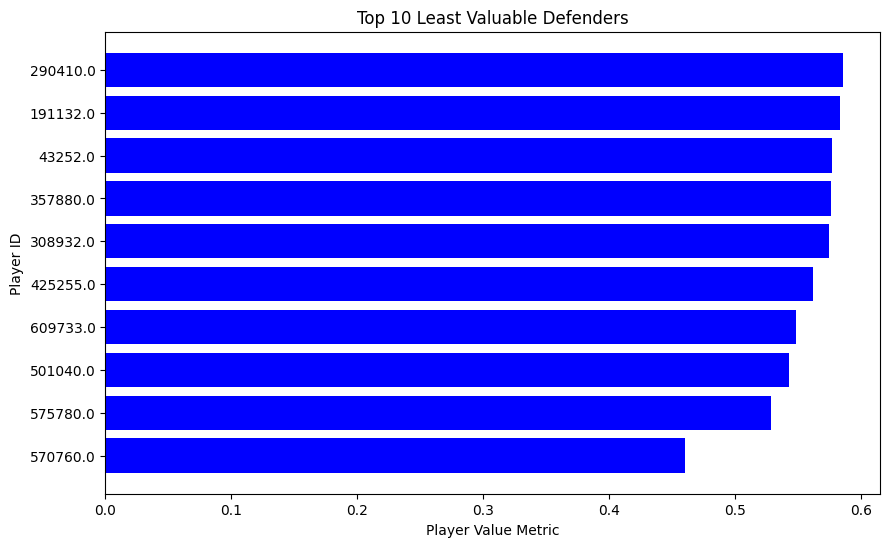

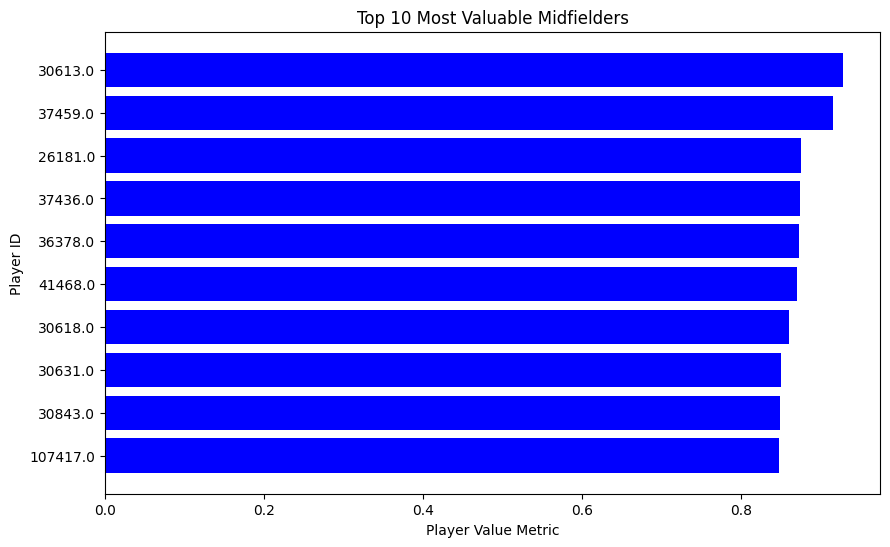

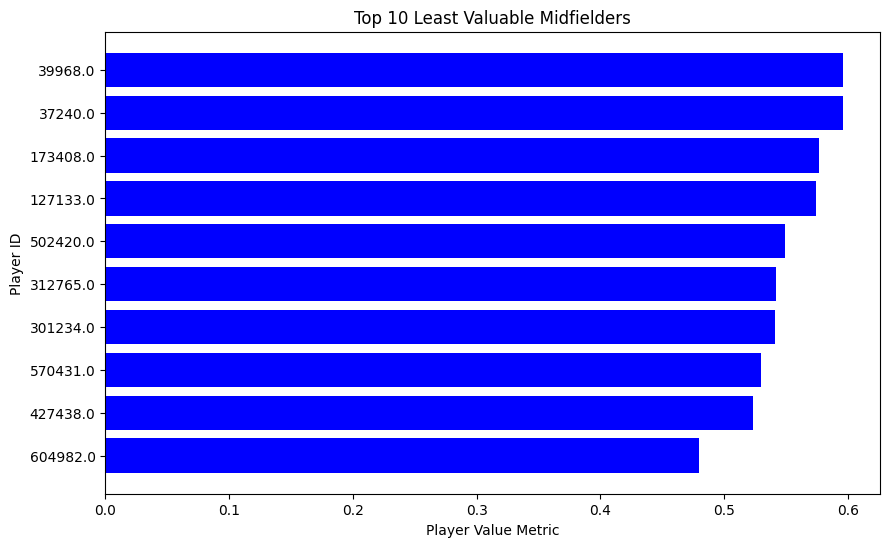

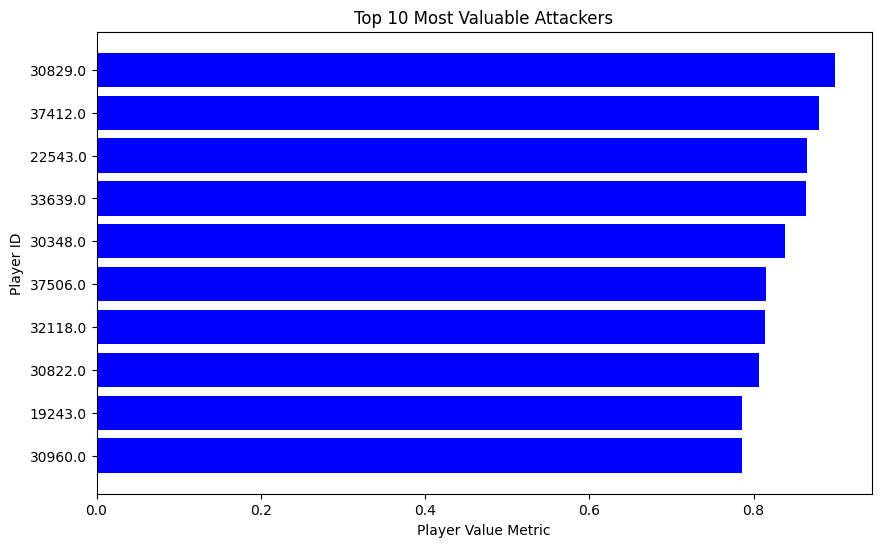

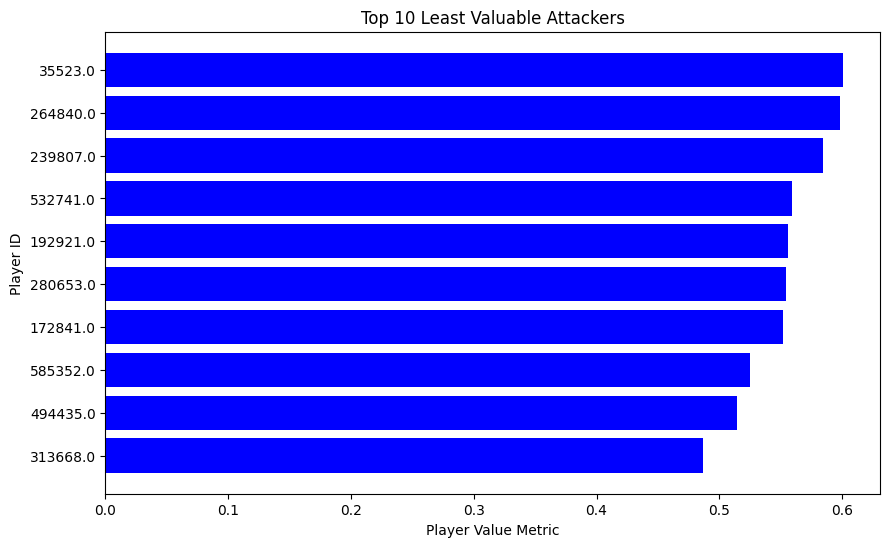

In [13]:
# Step 1: Remove GK Threshold and Compute Scores for All Players Across All Roles

# Normalize attributes for all role-based metrics
def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) if series.max() > series.min() else series

# Normalize Goalkeeper Attributes
players_numeric_df["normalized_gk_diving"] = normalize(players_numeric_df["gk_diving"])
players_numeric_df["normalized_gk_handling"] = normalize(players_numeric_df["gk_handling"])
players_numeric_df["normalized_gk_kicking"] = normalize(players_numeric_df["gk_kicking"])
players_numeric_df["normalized_gk_positioning"] = normalize(players_numeric_df["gk_positioning"])
players_numeric_df["normalized_gk_reflexes"] = normalize(players_numeric_df["gk_reflexes"])
players_numeric_df["normalized_stamina"] = normalize(players_numeric_df["stamina"])

# Normalize Field Player Attributes
players_numeric_df["normalized_finishing"] = normalize(players_numeric_df["finishing"])
players_numeric_df["normalized_heading_accuracy"] = normalize(players_numeric_df["heading_accuracy"])
players_numeric_df["normalized_volleys"] = normalize(players_numeric_df["volleys"])
players_numeric_df["normalized_acceleration"] = normalize(players_numeric_df["acceleration"])
players_numeric_df["normalized_agility"] = normalize(players_numeric_df["agility"])
players_numeric_df["normalized_reactions"] = normalize(players_numeric_df["reactions"])
players_numeric_df["normalized_balance"] = normalize(players_numeric_df["balance"])
players_numeric_df["normalized_shot_power"] = normalize(players_numeric_df["shot_power"])
players_numeric_df["normalized_positioning"] = normalize(players_numeric_df["positioning"])

players_numeric_df["normalized_crossing"] = normalize(players_numeric_df["crossing"])
players_numeric_df["normalized_dribbling"] = normalize(players_numeric_df["dribbling"])
players_numeric_df["normalized_ball_control"] = normalize(players_numeric_df["ball_control"])
players_numeric_df["normalized_long_passing"] = normalize(players_numeric_df["long_passing"])
players_numeric_df["normalized_short_passing"] = normalize(players_numeric_df["short_passing"])
players_numeric_df["normalized_vision"] = normalize(players_numeric_df["vision"])

players_numeric_df["normalized_aggression"] = normalize(players_numeric_df["aggression"])
players_numeric_df["normalized_interceptions"] = normalize(players_numeric_df["interceptions"])
players_numeric_df["normalized_marking"] = normalize(players_numeric_df["marking"])
players_numeric_df["normalized_standing_tackle"] = normalize(players_numeric_df["standing_tackle"])
players_numeric_df["normalized_sliding_tackle"] = normalize(players_numeric_df["sliding_tackle"])

# Step 2: Compute position-based scores for all players
players_numeric_df["score_gk"] = (
    players_numeric_df["normalized_gk_diving"] * 0.15 +
    players_numeric_df["normalized_gk_handling"] * 0.15 +
    players_numeric_df["normalized_gk_kicking"] * 0.15 +
    players_numeric_df["normalized_gk_positioning"] * 0.20 +
    players_numeric_df["normalized_gk_reflexes"] * 0.15 +
    players_numeric_df["normalized_stamina"] * 0.10
)

players_numeric_df["score_att"] = (
    players_numeric_df["normalized_finishing"] * 0.20 +
    players_numeric_df["normalized_heading_accuracy"] * 0.10 +
    players_numeric_df["normalized_volleys"] * 0.10 +
    players_numeric_df["normalized_acceleration"] * 0.10 +
    players_numeric_df["normalized_agility"] * 0.10 +
    players_numeric_df["normalized_reactions"] * 0.10 +
    players_numeric_df["normalized_balance"] * 0.05 +
    players_numeric_df["normalized_shot_power"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.05 +
    players_numeric_df["normalized_strength"] * 0.05 +
    players_numeric_df["normalized_positioning"] * 0.05
)

players_numeric_df["score_mid"] = (
    players_numeric_df["normalized_crossing"] * 0.10 +
    players_numeric_df["normalized_dribbling"] * 0.10 +
    players_numeric_df["normalized_ball_control"] * 0.10 +
    players_numeric_df["normalized_long_passing"] * 0.15 +
    players_numeric_df["normalized_short_passing"] * 0.15 +
    players_numeric_df["normalized_agility"] * 0.10 +
    players_numeric_df["normalized_reactions"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.05 +
    players_numeric_df["normalized_positioning"] * 0.10 +
    players_numeric_df["normalized_vision"] * 0.05
)

players_numeric_df["score_def"] = (
    players_numeric_df["normalized_reactions"] * 0.15 +
    players_numeric_df["normalized_jumping"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.10 +
    players_numeric_df["normalized_strength"] * 0.10 +
    players_numeric_df["normalized_aggression"] * 0.10 +
    players_numeric_df["normalized_interceptions"] * 0.15 +
    players_numeric_df["normalized_marking"] * 0.10 +
    players_numeric_df["normalized_standing_tackle"] * 0.10 +
    players_numeric_df["normalized_sliding_tackle"] * 0.10
)

# Step 3: Assign Position Based on Highest Score
players_numeric_df["position"] = players_numeric_df[
    ["score_gk", "score_att", "score_mid", "score_def"]
].idxmax(axis=1)

# Map positions to readable labels
position_map = {
    "score_gk": "Goalkeeper",
    "score_att": "Attacker",
    "score_mid": "Midfielder",
    "score_def": "Defender"
}
players_numeric_df["position"] = players_numeric_df["position"].map(position_map)

# Step 4: Rank Players Based on Position-Specific Score
players_numeric_df["player_value_metric"] = players_numeric_df.apply(
    lambda row: row[row["position"].replace("Goalkeeper", "score_gk")
                    .replace("Attacker", "score_att")
                    .replace("Midfielder", "score_mid")
                    .replace("Defender", "score_def")], axis=1
)

# Step 5: Sort Players and Save Files
sorted_players = players_numeric_df[['player_id', 'position', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players overall
top_10_overall = sorted_players.head(10)
bottom_10_overall = sorted_players.tail(10)

# Save overall rankings
top_10_overall.to_csv("most_valuable_overallF4.csv", index=False)
bottom_10_overall.to_csv("least_valuable_overallF4.csv", index=False)

# Extract and save rankings per position
positions = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]
for pos in positions:
    position_players = sorted_players[sorted_players["position"] == pos]
    position_players.head(10).to_csv(f"most_valuable_{pos.lower()}sF4.csv", index=False)
    position_players.tail(10).to_csv(f"least_valuable_{pos.lower()}sF4.csv", index=False)

# Step 6: Generate Bar Charts
def plot_ranking_chart(df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(df["player_id"].astype(str), df["player_value_metric"], color="blue")
    plt.xlabel("Player Value Metric")
    plt.ylabel("Player ID")
    plt.title(title)
    plt.gca().invert_yaxis()  # Highest values on top
    plt.show()

# Plot for overall rankings
plot_ranking_chart(top_10_overall, "Top 10 Most Valuable Players (Overall)")
plot_ranking_chart(bottom_10_overall, "Top 10 Least Valuable Players (Overall)")

# Plot for each position
for pos in positions:
    plot_ranking_chart(sorted_players[sorted_players["position"] == pos].head(10), f"Top 10 Most Valuable {pos}s")
    plot_ranking_chart(sorted_players[sorted_players["position"] == pos].tail(10), f"Top 10 Least Valuable {pos}s")


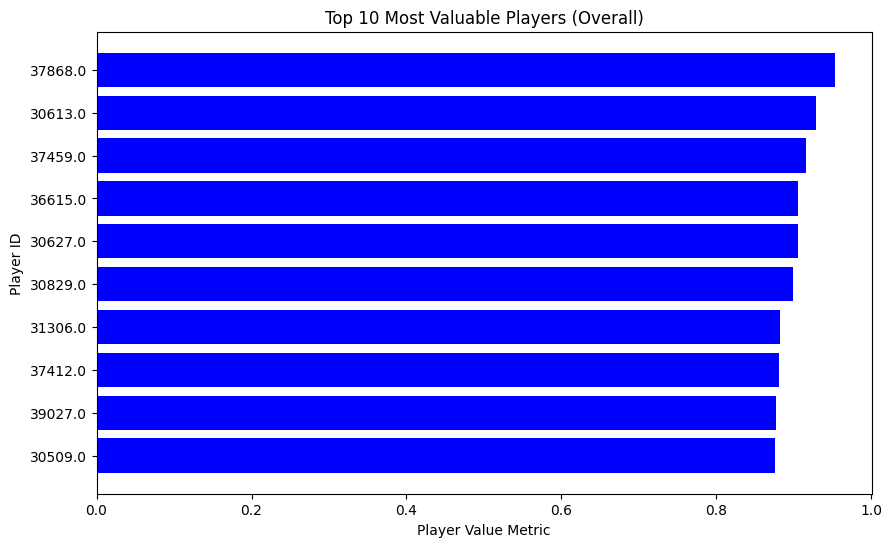

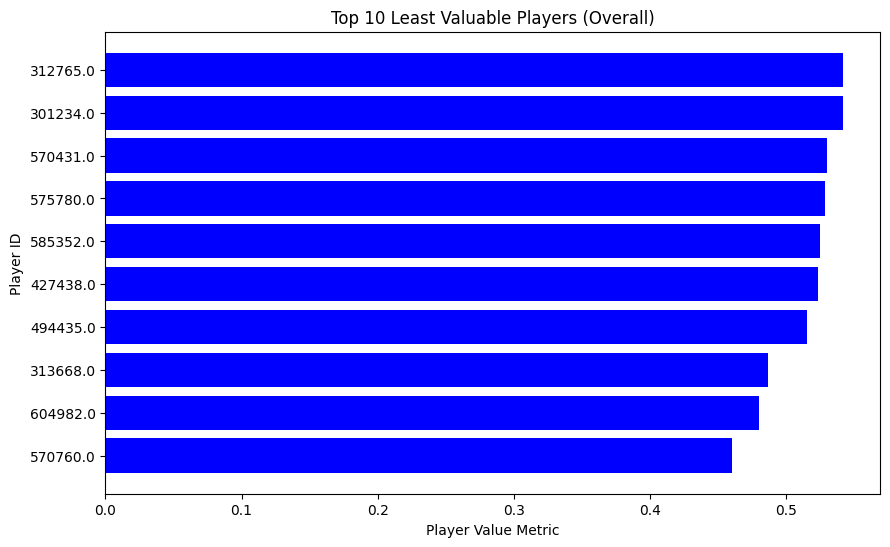

In [14]:
# Step 1: Adjust Normalization & Weighting for GK Metrics
# Increase GK metric influence and ensure normalization is correct

def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) if series.max() > series.min() else series

# Normalize all GK attributes
players_numeric_df["normalized_gk_diving"] = normalize(players_numeric_df["gk_diving"])
players_numeric_df["normalized_gk_handling"] = normalize(players_numeric_df["gk_handling"])
players_numeric_df["normalized_gk_kicking"] = normalize(players_numeric_df["gk_kicking"])
players_numeric_df["normalized_gk_positioning"] = normalize(players_numeric_df["gk_positioning"])
players_numeric_df["normalized_gk_reflexes"] = normalize(players_numeric_df["gk_reflexes"])
players_numeric_df["normalized_stamina"] = normalize(players_numeric_df["stamina"])
players_numeric_df["normalized_jumping"] = normalize(players_numeric_df["jumping"])
players_numeric_df["normalized_strength"] = normalize(players_numeric_df["strength"])

# Normalize Field Player Attributes
players_numeric_df["normalized_finishing"] = normalize(players_numeric_df["finishing"])
players_numeric_df["normalized_heading_accuracy"] = normalize(players_numeric_df["heading_accuracy"])
players_numeric_df["normalized_volleys"] = normalize(players_numeric_df["volleys"])
players_numeric_df["normalized_acceleration"] = normalize(players_numeric_df["acceleration"])
players_numeric_df["normalized_agility"] = normalize(players_numeric_df["agility"])
players_numeric_df["normalized_reactions"] = normalize(players_numeric_df["reactions"])
players_numeric_df["normalized_balance"] = normalize(players_numeric_df["balance"])
players_numeric_df["normalized_shot_power"] = normalize(players_numeric_df["shot_power"])
players_numeric_df["normalized_positioning"] = normalize(players_numeric_df["positioning"])

players_numeric_df["normalized_crossing"] = normalize(players_numeric_df["crossing"])
players_numeric_df["normalized_dribbling"] = normalize(players_numeric_df["dribbling"])
players_numeric_df["normalized_ball_control"] = normalize(players_numeric_df["ball_control"])
players_numeric_df["normalized_long_passing"] = normalize(players_numeric_df["long_passing"])
players_numeric_df["normalized_short_passing"] = normalize(players_numeric_df["short_passing"])
players_numeric_df["normalized_vision"] = normalize(players_numeric_df["vision"])

players_numeric_df["normalized_aggression"] = normalize(players_numeric_df["aggression"])
players_numeric_df["normalized_interceptions"] = normalize(players_numeric_df["interceptions"])
players_numeric_df["normalized_marking"] = normalize(players_numeric_df["marking"])
players_numeric_df["normalized_standing_tackle"] = normalize(players_numeric_df["standing_tackle"])
players_numeric_df["normalized_sliding_tackle"] = normalize(players_numeric_df["sliding_tackle"])

# Step 2: Adjust GK Weighting & Add Position Locking If GK Score is Higher

players_numeric_df["score_gk"] = (
    players_numeric_df["normalized_gk_diving"] * 0.20 +
    players_numeric_df["normalized_gk_handling"] * 0.20 +
    players_numeric_df["normalized_gk_kicking"] * 0.10 +
    players_numeric_df["normalized_gk_positioning"] * 0.20 +
    players_numeric_df["normalized_gk_reflexes"] * 0.25 +  # Increased weight for reflexes
    players_numeric_df["normalized_stamina"] * 0.05
)

players_numeric_df["score_att"] = (
    players_numeric_df["normalized_finishing"] * 0.20 +
    players_numeric_df["normalized_heading_accuracy"] * 0.10 +
    players_numeric_df["normalized_volleys"] * 0.10 +
    players_numeric_df["normalized_acceleration"] * 0.10 +
    players_numeric_df["normalized_agility"] * 0.10 +
    players_numeric_df["normalized_reactions"] * 0.10 +
    players_numeric_df["normalized_balance"] * 0.05 +
    players_numeric_df["normalized_shot_power"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.05 +
    players_numeric_df["normalized_strength"] * 0.05 +
    players_numeric_df["normalized_positioning"] * 0.05
)

players_numeric_df["score_mid"] = (
    players_numeric_df["normalized_crossing"] * 0.10 +
    players_numeric_df["normalized_dribbling"] * 0.10 +
    players_numeric_df["normalized_ball_control"] * 0.10 +
    players_numeric_df["normalized_long_passing"] * 0.15 +
    players_numeric_df["normalized_short_passing"] * 0.15 +
    players_numeric_df["normalized_agility"] * 0.10 +
    players_numeric_df["normalized_reactions"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.05 +
    players_numeric_df["normalized_positioning"] * 0.10 +
    players_numeric_df["normalized_vision"] * 0.05
)

players_numeric_df["score_def"] = (
    players_numeric_df["normalized_reactions"] * 0.15 +
    players_numeric_df["normalized_jumping"] * 0.10 +
    players_numeric_df["normalized_stamina"] * 0.10 +
    players_numeric_df["normalized_strength"] * 0.10 +
    players_numeric_df["normalized_aggression"] * 0.10 +
    players_numeric_df["normalized_interceptions"] * 0.15 +
    players_numeric_df["normalized_marking"] * 0.10 +
    players_numeric_df["normalized_standing_tackle"] * 0.10 +
    players_numeric_df["normalized_sliding_tackle"] * 0.10
)

# Step 3: Assign Position Based on Highest Score, But Lock to GK If Score_gk is Highest

players_numeric_df["position"] = players_numeric_df[
    ["score_gk", "score_att", "score_mid", "score_def"]
].idxmax(axis=1)

# Map positions to readable labels
position_map = {
    "score_gk": "Goalkeeper",
    "score_att": "Attacker",
    "score_mid": "Midfielder",
    "score_def": "Defender"
}
players_numeric_df["position"] = players_numeric_df["position"].map(position_map)

# Step 4: Rank Players Based on Position-Specific Score
players_numeric_df["player_value_metric"] = players_numeric_df.apply(
    lambda row: row[row["position"].replace("Goalkeeper", "score_gk")
                    .replace("Attacker", "score_att")
                    .replace("Midfielder", "score_mid")
                    .replace("Defender", "score_def")], axis=1
)

# Step 5: Sort Players and Save Files
sorted_players = players_numeric_df[['player_id', 'position', 'player_value_metric']].sort_values(by='player_value_metric', ascending=False)

# Extract top 10 most and least valuable players overall
top_10_overall = sorted_players.head(10)
bottom_10_overall = sorted_players.tail(10)

# Save overall rankings
top_10_overall.to_csv("most_valuable_overall.csv", index=False)
bottom_10_overall.to_csv("least_valuable_overall.csv", index=False)

# Extract and save rankings per position
positions = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]
for pos in positions:
    position_players = sorted_players[sorted_players["position"] == pos]
    position_players.head(10).to_csv(f"most_valuable_{pos.lower()}s.csv", index=False)
    position_players.tail(10).to_csv(f"least_valuable_{pos.lower()}s.csv", index=False)

# Step 6: Generate Bar Charts
def plot_ranking_chart(df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(df["player_id"].astype(str), df["player_value_metric"], color="blue")
    plt.xlabel("Player Value Metric")
    plt.ylabel("Player ID")
    plt.title(title)
    plt.gca().invert_yaxis()  # Highest values on top
    plt.show()

# Plot for overall rankings
plot_ranking_chart(top_10_overall, "Top 10 Most Valuable Players (Overall)")
plot_ranking_chart(bottom_10_overall, "Top 10 Least Valuable Players (Overall)")


### Step 2: Predicting 2015-2016

In [15]:
# Load the training matches dataset
matches_train_df = pd.read_csv("epl_matches_train.csv")

# Step 1: Extract match outcomes (Win, Draw, Lose)
matches_train_df["match_result"] = matches_train_df.apply(
    lambda row: "Win" if row["home_team_goal"] > row["away_team_goal"]
    else "Lose" if row["home_team_goal"] < row["away_team_goal"]
    else "Draw",
    axis=1
)

# Step 2: Compute team performance statistics
team_performance = matches_train_df.groupby("home_team_id").agg(
    total_home_matches=("match_id", "count"),
    total_home_wins=("match_result", lambda x: (x == "Win").sum()),
    total_home_losses=("match_result", lambda x: (x == "Lose").sum()),
    total_home_draws=("match_result", lambda x: (x == "Draw").sum()),
    avg_home_goals_scored=("home_team_goal", "mean"),
    avg_home_goals_conceded=("away_team_goal", "mean")
).reset_index()

# Compute win, draw, and loss rates
team_performance["home_win_rate"] = team_performance["total_home_wins"] / team_performance["total_home_matches"]
team_performance["home_draw_rate"] = team_performance["total_home_draws"] / team_performance["total_home_matches"]
team_performance["home_loss_rate"] = team_performance["total_home_losses"] / team_performance["total_home_matches"]

# Sort teams by home win rate
team_performance_sorted = team_performance.sort_values(by="home_win_rate", ascending=False)

# Display results for review
team_performance_sorted

,home_team_id,total_home_matches,total_home_wins,total_home_losses,total_home_draws,avg_home_goals_scored,avg_home_goals_conceded,home_win_rate,home_draw_rate,home_loss_rate
30,10260,133,104,18,11,2.338346,0.834586,0.781955,0.082707,0.135338
4,8456,133,101,16,16,2.390977,0.781955,0.759398,0.120301,0.120301
3,8455,133,96,12,25,2.263158,0.744361,0.721805,0.187970,0.090226
22,9825,133,85,18,30,2.067669,0.834586,0.639098,0.225564,0.135338
14,8650,133,78,20,35,1.962406,0.842105,0.586466,0.263158,0.150376
12,8586,133,78,25,30,1.654135,0.924812,0.586466,0.225564,0.187970
20,8668,133,70,25,38,1.676692,1.022556,0.526316,0.285714,0.187970
28,10194,133,61,33,39,1.368421,1.015038,0.458647,0.293233,0.248120
25,9879,114,52,38,24,1.517544,1.298246,0.456140,0.210526,0.333333
6,8466,57,25,15,17,1.666667,1.052632,0.438596,0.298246,0.263158


In [16]:
# Step 3: Compute away team performance statistics
away_performance = matches_train_df.groupby("away_team_id").agg(
    total_away_matches=("match_id", "count"),
    total_away_wins=("match_result", lambda x: (x == "Lose").sum()),  # "Lose" because it's a home loss = away win
    total_away_losses=("match_result", lambda x: (x == "Win").sum()),  # "Win" because it's a home win = away loss
    total_away_draws=("match_result", lambda x: (x == "Draw").sum()),
    avg_away_goals_scored=("away_team_goal", "mean"),
    avg_away_goals_conceded=("home_team_goal", "mean")
).reset_index()

# Compute win, draw, and loss rates for away matches
away_performance["away_win_rate"] = away_performance["total_away_wins"] / away_performance["total_away_matches"]
away_performance["away_draw_rate"] = away_performance["total_away_draws"] / away_performance["total_away_matches"]
away_performance["away_loss_rate"] = away_performance["total_away_losses"] / away_performance["total_away_matches"]

# Step 4: Merge home and away performance into a single dataset
team_performance = team_performance.merge(
    away_performance, left_on="home_team_id", right_on="away_team_id", suffixes=("_home", "_away")
).drop(columns=["away_team_id"])

# Step 5: Sort teams by overall combined win rate (home + away average)
team_performance["overall_win_rate"] = (team_performance["home_win_rate"] + team_performance["away_win_rate"]) / 2
team_performance_sorted = team_performance.sort_values(by="overall_win_rate", ascending=False)

# Display the updated team performance stats
team_performance_sorted

,home_team_id,total_home_matches,total_home_wins,total_home_losses,total_home_draws,avg_home_goals_scored,avg_home_goals_conceded,home_win_rate,home_draw_rate,home_loss_rate,total_away_matches,total_away_wins,total_away_losses,total_away_draws,avg_away_goals_scored,avg_away_goals_conceded,away_win_rate,away_draw_rate,away_loss_rate,overall_win_rate
30,10260,133,104,18,11,2.338346,0.834586,0.781955,0.082707,0.135338,133,69,27,37,1.669173,1.007519,0.518797,0.278195,0.203008,0.650376
3,8455,133,96,12,25,2.263158,0.744361,0.721805,0.187970,0.090226,133,68,34,31,1.676692,1.007519,0.511278,0.233083,0.255639,0.616541
4,8456,133,101,16,16,2.390977,0.781955,0.759398,0.120301,0.120301,133,55,42,36,1.631579,1.218045,0.413534,0.270677,0.315789,0.586466
22,9825,133,85,18,30,2.067669,0.834586,0.639098,0.225564,0.135338,133,65,36,32,1.751880,1.300752,0.488722,0.240602,0.270677,0.563910
14,8650,133,78,20,35,1.962406,0.842105,0.586466,0.263158,0.150376,133,56,48,29,1.556391,1.315789,0.421053,0.218045,0.360902,0.503759
12,8586,133,78,25,30,1.654135,0.924812,0.586466,0.225564,0.187970,133,54,48,31,1.443609,1.503759,0.406015,0.233083,0.360902,0.496241
20,8668,133,70,25,38,1.676692,1.022556,0.526316,0.285714,0.187970,133,40,45,48,1.180451,1.233083,0.300752,0.360902,0.338346,0.413534
6,8466,57,25,15,17,1.666667,1.052632,0.438596,0.298246,0.263158,57,17,26,14,1.087719,1.385965,0.298246,0.245614,0.456140,0.368421
23,9826,38,14,18,6,1.026316,1.315789,0.368421,0.157895,0.473684,38,12,17,9,1.078947,1.289474,0.315789,0.236842,0.447368,0.342105
26,10003,76,29,22,25,1.513158,1.210526,0.381579,0.328947,0.289474,76,21,39,16,1.000000,1.486842,0.276316,0.210526,0.513158,0.328947


Step 2.1

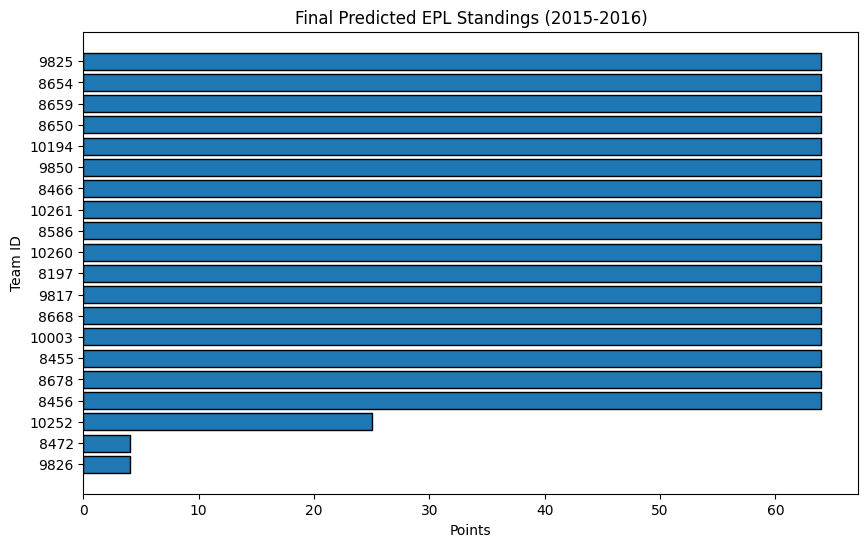

,team_id,points
0,9825,64
1,8654,64
2,8659,64
3,8650,64
4,10194,64
5,9850,64
6,8466,64
7,10261,64
8,8586,64
9,10260,64


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load datasets
matches_train = pd.read_csv("epl_matches_train.csv")
matches_test = pd.read_csv("epl_matches_test.csv")
teams = pd.read_csv("epl_teams.csv")

# Step 1: Compute team performance metrics from historical matches

# Home team performance
home_stats = matches_train.groupby("home_team_id").agg(
    home_wins=("home_team_goal", lambda x: (x > matches_train.loc[x.index, "away_team_goal"]).sum()),
    home_draws=("home_team_goal", lambda x: (x == matches_train.loc[x.index, "away_team_goal"]).sum()),
    home_losses=("home_team_goal", lambda x: (x < matches_train.loc[x.index, "away_team_goal"]).sum()),
    home_goals_scored=("home_team_goal", "sum"),
    home_goals_conceded=("away_team_goal", "sum"),
    home_games_played=("home_team_goal", "count")
).reset_index()

# Calculate win/draw/loss rates
home_stats["home_win_rate"] = home_stats["home_wins"] / home_stats["home_games_played"]
home_stats["home_draw_rate"] = home_stats["home_draws"] / home_stats["home_games_played"]
home_stats["home_loss_rate"] = home_stats["home_losses"] / home_stats["home_games_played"]
home_stats.fillna(0, inplace=True)

# Step 2: Merge computed stats with the matches dataset

# Merge home team stats into training dataset
matches_train = matches_train.merge(home_stats, left_on="home_team_id", right_on="home_team_id", how="left")

# Define match outcome (Win=1, Draw=0, Lose=-1)
matches_train["match_outcome"] = np.where(
    matches_train["home_team_goal"] > matches_train["away_team_goal"], 1,
    np.where(matches_train["home_team_goal"] < matches_train["away_team_goal"], -1, 0)
)

# Select relevant features
features = ["home_win_rate", "home_draw_rate", "home_loss_rate", "home_goals_scored", "home_goals_conceded"]
X = matches_train[features]
y = matches_train["match_outcome"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=["Lose", "Draw", "Win"])

# Step 3: Apply model to 2015-2016 season (test dataset)

# Merge home team stats into test dataset
matches_test = matches_test.merge(home_stats, left_on="home_team_id", right_on="home_team_id", how="left")

# Prepare test features
X_test = matches_test[features]
X_test = imputer.transform(X_test)
X_test = scaler.transform(X_test)

# Predict match outcomes
test_predictions = rf_model.predict(X_test)

# Save predictions
matches_test["predicted_outcome"] = test_predictions
submission_df = matches_test[["home_team_id", "away_team_id", "predicted_outcome"]]
submission_df.to_csv("prediction_submission_step2_1.csv", index=False)

# Step 4: Compute final EPL standings (Realistic points system)

# Initialize dictionary for team points
team_points = {}

# Assign points based on predictions
for _, row in submission_df.iterrows():
    home_team = row["home_team_id"]
    away_team = row["away_team_id"]
    outcome = row["predicted_outcome"]
    
    # Initialize teams if not already present
    if home_team not in team_points:
        team_points[home_team] = 0
    if away_team not in team_points:
        team_points[away_team] = 0

    # Assign points correctly
    if outcome == 1:  # Home Win
        team_points[home_team] += 3
    elif outcome == 0:  # Draw
        team_points[home_team] += 1
        team_points[away_team] += 1
    else:  # Away Win
        team_points[away_team] += 3

# Convert to DataFrame and sort standings
standings_df = pd.DataFrame(list(team_points.items()), columns=["team_id", "points"])
standings_df = standings_df.sort_values(by="points", ascending=False).reset_index(drop=True)

# Step 5: Visualize the final EPL standings

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(standings_df["team_id"].astype(str), standings_df["points"], edgecolor='black')
plt.xlabel("Points")
plt.ylabel("Team ID")
plt.title("Final Predicted EPL Standings (2015-2016)")
plt.gca().invert_yaxis()  # Invert to show highest points on top
plt.show()

# Display top 20 teams in standings
standings_df.head(20)


In [18]:
# Inspect the available columns in all datasets to find better metrics for prediction
train_columns = matches_train.columns.tolist()
test_columns = matches_test.columns.tolist()
team_columns = teams.columns.tolist()

train_columns, test_columns, team_columns


(['season',
  'stage',
  'date',
  'match_id',
  'home_team_id',
  'away_team_id',
  'home_player_X1',
  'home_player_X2',
  'home_player_X3',
  'home_player_X4',
  'home_player_X5',
  'home_player_X6',
  'home_player_X7',
  'home_player_X8',
  'home_player_X9',
  'home_player_X10',
  'home_player_X11',
  'away_player_X1',
  'away_player_X2',
  'away_player_X3',
  'away_player_X4',
  'away_player_X5',
  'away_player_X6',
  'away_player_X7',
  'away_player_X8',
  'away_player_X9',
  'away_player_X10',
  'away_player_X11',
  'home_player_Y1',
  'home_player_Y2',
  'home_player_Y3',
  'home_player_Y4',
  'home_player_Y5',
  'home_player_Y6',
  'home_player_Y7',
  'home_player_Y8',
  'home_player_Y9',
  'home_player_Y10',
  'home_player_Y11',
  'away_player_Y1',
  'away_player_Y2',
  'away_player_Y3',
  'away_player_Y4',
  'away_player_Y5',
  'away_player_Y6',
  'away_player_Y7',
  'away_player_Y8',
  'away_player_Y9',
  'away_player_Y10',
  'away_player_Y11',
  'home_player_1',
  'home_pl

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load datasets
matches_train = pd.read_csv("epl_matches_train.csv")
matches_test = pd.read_csv("epl_matches_test.csv")
teams = pd.read_csv("epl_teams.csv")

# %% [markdown]
# ## **Section 1: Compute Team Performance Metrics**
# In this section, we calculate:
# - Home team **win, draw, and loss rates**
# - Home team **goals scored and conceded**
# 

# Compute home team performance statistics
home_stats = matches_train.groupby("home_team_id").agg(
    home_wins=("home_team_goal", lambda x: (x > matches_train.loc[x.index, "away_team_goal"]).sum()),
    home_draws=("home_team_goal", lambda x: (x == matches_train.loc[x.index, "away_team_goal"]).sum()),
    home_losses=("home_team_goal", lambda x: (x < matches_train.loc[x.index, "away_team_goal"]).sum()),
    home_goals_scored=("home_team_goal", "sum"),
    home_goals_conceded=("away_team_goal", "sum"),
    home_games_played=("home_team_goal", "count")
).reset_index()

# Calculate win, draw, and loss rates
home_stats["home_win_rate"] = home_stats["home_wins"] / home_stats["home_games_played"]
home_stats["home_draw_rate"] = home_stats["home_draws"] / home_stats["home_games_played"]
home_stats["home_loss_rate"] = home_stats["home_losses"] / home_stats["home_games_played"]
home_stats.fillna(0, inplace=True)


# ## **Section 2: Extract Additional Team Attributes**
# Here, we extract **team-specific attributes** from `epl_teams.csv`:
# - **Chance creation (passing & shooting)**
# - **Defensive pressure & aggression**
# 

# Keep only the latest season's data for each team
teams_cleaned = teams.sort_values(by="date", ascending=False).drop_duplicates(subset="team_id", keep="first")

# Create a lookup dictionary for quick team attribute retrieval
teams_dict = teams_cleaned.set_index("team_id")[
    ["chanceCreationPassing", "chanceCreationShooting", "defencePressure", "defenceAggression"]
].to_dict(orient="index")

# Function to retrieve team attributes efficiently
def get_team_attributes(team_id):
    return teams_dict.get(team_id, {"chanceCreationPassing": 0, "chanceCreationShooting": 0,
                                    "defencePressure": 0, "defenceAggression": 0})

# Apply function to training data
matches_train[["home_passing", "home_shooting", "home_defense_pressure", "home_defense_aggression"]] = \
    matches_train["home_team_id"].apply(lambda x: pd.Series(get_team_attributes(x)))

matches_train[["away_passing", "away_shooting", "away_defense_pressure", "away_defense_aggression"]] = \
    matches_train["away_team_id"].apply(lambda x: pd.Series(get_team_attributes(x)))

# Define match outcome (Win=1, Draw=0, Lose=-1)
matches_train["match_outcome"] = np.where(
    matches_train["home_team_goal"] > matches_train["away_team_goal"], 1,
    np.where(matches_train["home_team_goal"] < matches_train["away_team_goal"], -1, 0)
)


# %% [markdown]
# ## **Section 3: Model Training**
# In this section:
# - **Select relevant features**
# - **Handle missing values**
# - **Standardize features**
# - **Train Random Forest Model**
# - **Evaluate model performance**
# 
# Ensure column names match exactly
expected_features = ["home_win_rate", "home_draw_rate", "home_loss_rate", 
                     "home_goals_scored", "home_goals_conceded", 
                     "home_passing", "home_shooting", "home_defense_pressure", "home_defense_aggression",
                     "away_passing", "away_shooting", "away_defense_pressure", "away_defense_aggression"]

# Confirm all expected features exist in matches_train
valid_features = [col for col in expected_features if col in matches_train.columns]

# Prepare training features with validated column names
X = matches_train[valid_features]
y = matches_train["match_outcome"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=["Lose", "Draw", "Win"])

# Display model accuracy and classification report
print(f"Model Accuracy: {accuracy:.2f}")
print(report)

# %% [markdown]
# ## **Section 4: Match Prediction & Standings Computation**
# - **Apply the trained model to the 2015-2016 season.**
# - **Compute the final EPL standings.**
# 
# Debugging: At the end, we will **print the top 10 teams**.

# Apply optimized function to test dataset
matches_test[["home_passing", "home_shooting", "home_defense_pressure", "home_defense_aggression"]] = \
    matches_test["home_team_id"].apply(lambda x: pd.Series(get_team_attributes(x)))

matches_test[["away_passing", "away_shooting", "away_defense_pressure", "away_defense_aggression"]] = \
    matches_test["away_team_id"].apply(lambda x: pd.Series(get_team_attributes(x)))

# Ensure features exist in matches_test before selecting them
valid_test_features = [col for col in expected_features if col in matches_test.columns]

# Prepare test features
X_test = matches_test[valid_test_features]
X_test = imputer.transform(X_test)
X_test = scaler.transform(X_test)

# Predict match outcomes
test_predictions = rf_model.predict(X_test)

# Save predictions
matches_test["predicted_outcome"] = test_predictions
submission_df = matches_test[["home_team_id", "away_team_id", "predicted_outcome"]]
submission_df.to_csv("predictions_matches.csv", index=False)

# Step 5: Compute Final EPL Standings

# Initialize dictionary for team points
team_points = {}

# Assign points based on predictions
for _, row in submission_df.iterrows():
    home_team = row["home_team_id"]
    away_team = row["away_team_id"]
    outcome = row["predicted_outcome"]
    
    # Initialize teams if not already present
    if home_team not in team_points:
        team_points[home_team] = 0
    if away_team not in team_points:
        team_points[away_team] = 0

    # Assign points correctly
    if outcome == 1:  # Home Win
        team_points[home_team] += 3
    elif outcome == 0:  # Draw
        team_points[home_team] += 1
        team_points[away_team] += 1
    else:  # Away Win
        team_points[away_team] += 3

# Convert to DataFrame and sort standings
standings_df = pd.DataFrame(list(team_points.items()), columns=["team_id", "points"])
standings_df = standings_df.sort_values(by="points", ascending=False).reset_index(drop=True)

# Save the final EPL standings to a CSV file
standings_df.to_csv("final_standings_pred.csv", index=False)

# Display top 10 teams in standings
print(standings_df.head(10))


Model Accuracy: 0.49
              precision    recall  f1-score   support

        Lose       0.47      0.50      0.49       150
        Draw       0.31      0.24      0.27       135
         Win       0.58      0.62      0.60       247

    accuracy                           0.49       532
   macro avg       0.45      0.46      0.45       532
weighted avg       0.48      0.49      0.48       532

   team_id  points
0    10260      89
1     8455      88
2     8456      82
3     9825      81
4     8586      80
5     8650      79
6     8668      66
7     8466      52
8    10194      45
9     8197      43


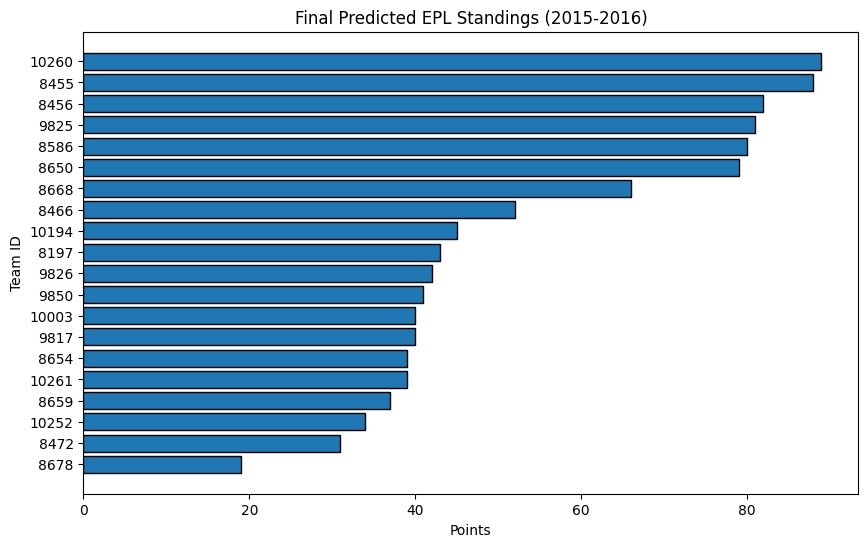

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(standings_df["team_id"].astype(str), standings_df["points"], edgecolor='black')
plt.xlabel("Points")
plt.ylabel("Team ID")
plt.title("Final Predicted EPL Standings (2015-2016)")
plt.gca().invert_yaxis()  # Invert to show highest points on top
plt.show()